In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from numpy import median

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [4]:
house_sales_df = pd.read_csv("house_sales_s1_mayel.csv",encoding='utf-8')

In [161]:
len(house_sales_df)

18560

In [162]:
house_sales_df.dropna(axis=1, how='all')
len(house_sales_df)

18560

In [103]:
house_sales_df['price'].min()

75000.0

In [104]:
house_sales_df['price'].max()

7700000.0

In [106]:
prices = house_sales_df['price']

In [107]:
pd.options.display.float_format = '{:12.2f}'.format

In [108]:
prices.describe()

count       18560.00
mean       541206.88
std        367989.38
min         75000.00
25%        322500.00
50%        450000.00
75%        645000.00
max       7700000.00
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

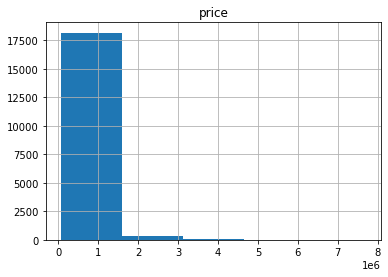

In [109]:
house_sales_df.hist(column='price', bins=5)

In [110]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

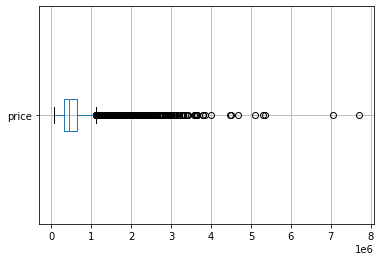

In [111]:
house_sales_df.boxplot(column=['price'], vert=False)

In [112]:
def clasifier(row):
    if row['price'] <= 75000:
        return "0-75000"
    elif row['price'] > 75000 and row['price'] <= 321950:
        return "75000-321950"
    elif row['price'] > 321950 and row['price'] <= 450000:
        return "321950-450000"
    elif row['price'] > 450000 and row['price'] <= 645000:
        return "450000-645000"
    elif row['price'] > 645000 and row['price'] <= 750000:
        return "645000-750000"
    elif row['price'] > 750000 and row['price'] <= 850000:
        return "750000-850000"
    elif row['price'] > 850000 and row['price'] <= 950000:
        return "850000-950000"
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return "950000-1500000"
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return "1500000-2000000"
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return "2000000-2500000"
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return "2500000-3000000"
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return "3000000-3500000"
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return "3500000-4000000"
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return "4000000-4500000"
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return "4500000-5000000"
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return "5000000-6000000"
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return "6000000-7000000"
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return "7000000-8000000"
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return "8000000-9000000"
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return "9000000-10000000"
    else:
        return ">10000000"

    

In [113]:
house_sales_df["price_range"] = house_sales_df.apply(clasifier, axis=1)

In [114]:
house_sales_df["price_range"]

0         75000-321950
1        450000-645000
2         75000-321950
3        450000-645000
4        450000-645000
             ...      
21608    321950-450000
21609    321950-450000
21610    321950-450000
21611    321950-450000
21612    321950-450000
Name: price_range, Length: 18560, dtype: object

In [139]:
def clasifier_int(row):
    if row['price'] <= 75000:
        return 1
    elif row['price'] > 75000 and row['price'] <= 321950:
        return 2
    elif row['price'] > 321950 and row['price'] <= 450000:
        return 3
    elif row['price'] > 450000 and row['price'] <= 645000:
        return 4
    elif row['price'] > 645000 and row['price'] <= 750000:
        return 5
    elif row['price'] > 750000 and row['price'] <= 850000:
        return 6
    elif row['price'] > 850000 and row['price'] <= 950000:
        return 7
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return 8
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return 9
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return 10
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return 11
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return 12
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return 13
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return 14
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return 15
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return 16
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return 17
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return 18
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return 19
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return 20
    else:
        return 21

In [140]:
house_sales_df["price_range_int"] = house_sales_df.apply(clasifier_int, axis=1)

In [141]:
house_sales_df["price_range_int"]

0        2
1        4
2        2
3        4
4        4
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: price_range_int, Length: 18560, dtype: int64

In [142]:
house_sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_bedrooms,predict_bathrooms,price_range,price_range_int
0,7129300520,20141013T000000,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,3.00,1.50,75000-321950,2
1,6414100192,20141209T000000,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,1991,98125,47.72,-122.32,1690,7639,3.00,2.00,450000-645000,4
2,5631500400,20150225T000000,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,0,98028,47.74,-122.23,2720,8062,2.00,1.00,75000-321950,2
3,2487200875,20141209T000000,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,0,98136,47.52,-122.39,1360,5000,3.00,2.00,450000-645000,4
4,1954400510,20150218T000000,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,0,98074,47.62,-122.05,1800,7503,3.00,2.00,450000-645000,4


In [143]:
train_df, test_df = train_test_split(house_sales_df, test_size=0.2, random_state=42, shuffle=True)

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
classifierTree = DecisionTreeClassifier()

In [146]:
X = train_df[['bathrooms', 'grade', 'sqft_living']]

In [147]:
len(X)

14848

In [148]:
X.head()

,bathrooms,grade,sqft_living
11644,2.50,9,3510.00
5136,2.75,9,2870.00
4554,1.50,7,2520.00
10345,2.50,8,1940.00
11315,2.50,8,2242.00


In [149]:
Y = train_df['price_range_int']

In [150]:
len(Y)

14848

In [151]:
Y.head()

11644    7
5136     5
4554     2
10345    3
11315    4
Name: price_range_int, dtype: int64

In [152]:
classifierTree = classifierTree.fit(X, Y)

In [153]:
Xt = test_df[['bathrooms', 'grade', 'sqft_living']]

In [154]:
Yt = test_df['price_range_int']

In [155]:
Yp = classifierTree.predict(Xt)

In [156]:
Yp

array([2, 3, 3, ..., 3, 2, 2])

In [157]:
Yt

13640    2
13065    5
11858    5
3185     4
11231    2
        ..
7437     4
12526    3
10642    5
9564     2
14092    4
Name: price_range_int, Length: 3712, dtype: int64

In [158]:
classifierTree.predict_proba(Xt)

array([[0.        , 0.7       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4       , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

[Text(464.5037175679262, 1069.6645161290323, 'X[1] <= 7.5\ngini = 0.797\nsamples = 14848\nvalue = [1, 3706, 3779, 3682, 1200, 817, 464, 836, 224, 73\n38, 15, 8, 2, 1, 1, 1]'),
 Text(152.74088033054662, 1034.593548387097, 'X[1] <= 6.5\ngini = 0.681\nsamples = 7761\nvalue = [1, 3257, 2436, 1598, 289, 106, 48, 23, 2, 1, 0\n0, 0, 0, 0, 0, 0]'),
 Text(49.35862798279884, 999.5225806451614, 'X[2] <= 1475.0\ngini = 0.5\nsamples = 1595\nvalue = [1, 1050, 389, 134, 9, 7, 1, 4, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(23.173216644649937, 964.4516129032259, 'X[1] <= 5.5\ngini = 0.451\nsamples = 1293\nvalue = [1, 912, 282, 85, 6, 5, 1, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(3.4268248123893312, 929.3806451612904, 'X[1] <= 3.5\ngini = 0.308\nsamples = 163\nvalue = [1, 134, 20, 5, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(2.0388431378060092, 894.3096774193549, 'X[2] <= 480.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(1.7879085977683467, 859.23870967

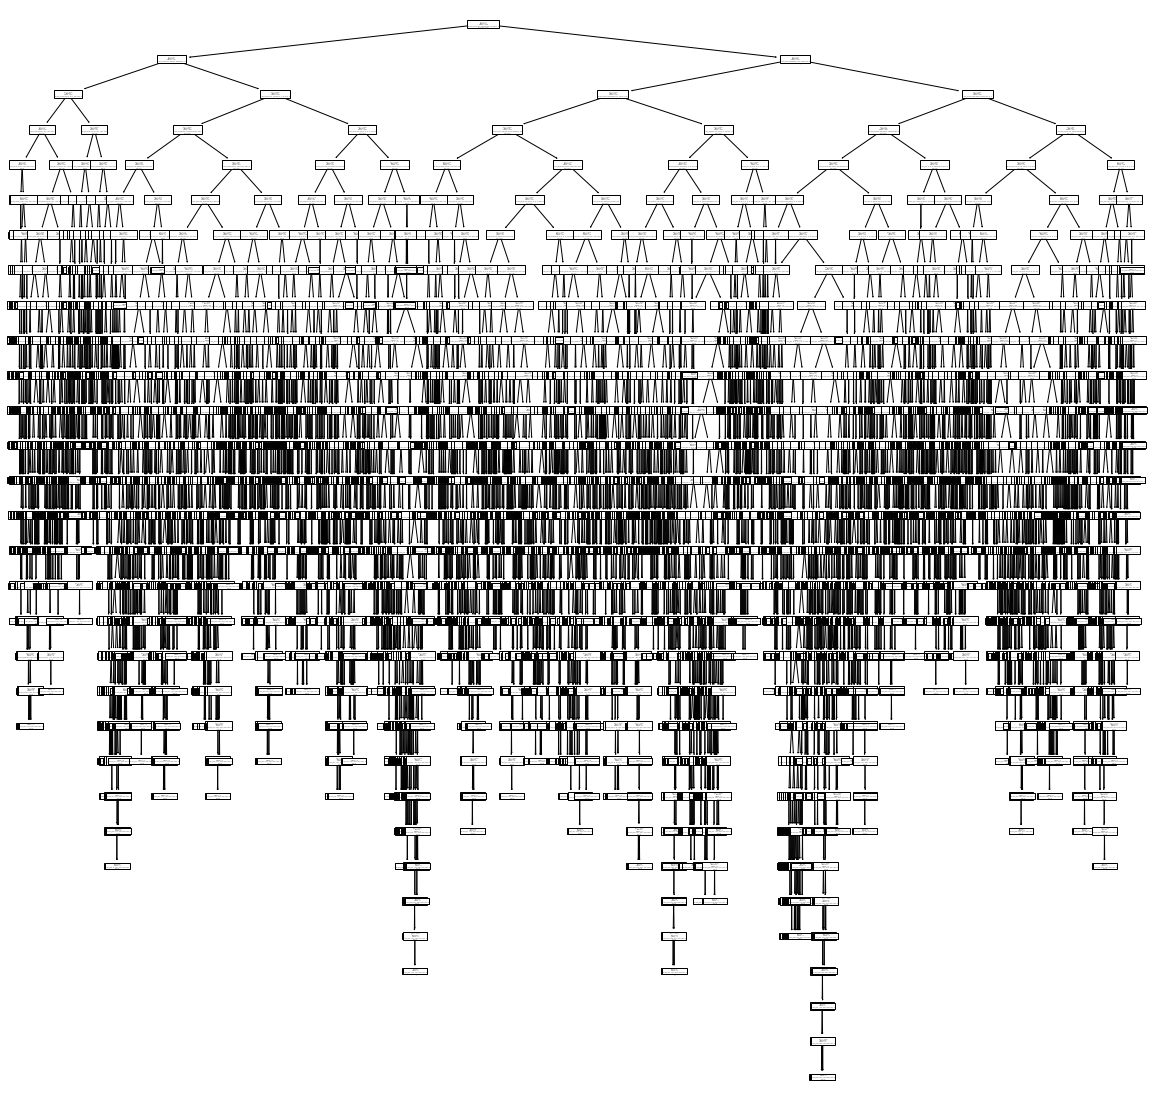

In [160]:
plt.figure(figsize=(20,20))
tree.plot_tree(classifierTree)